Importing the Libraries

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

Connecting the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = load_img("/content/drive/MyDrive/Image_data/train/stone/Stone- (1).jpg")

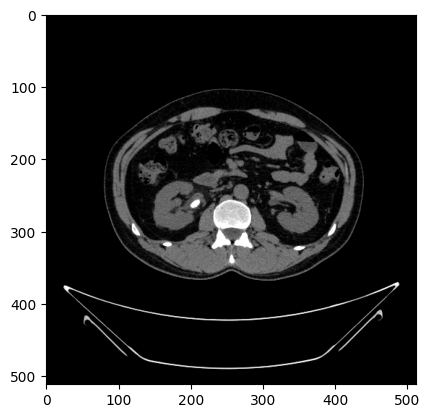

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/Image_data/train/stone/Stone- (1).jpg").shape

(512, 512, 3)

In [ ]:
train = ImageDataGenerator(rescale=1/512)
validation = ImageDataGenerator(rescale=1/512)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Image_data/train",
                                          target_size = (500,500),
                                          batch_size = 20,
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/Image_data/validation",
                                          target_size = (500,500),
                                          batch_size = 20,
                                          class_mode = 'binary')

Found 2265 images belonging to 2 classes.
Found 243 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'normal': 0, 'stone': 1}

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(500,500,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation = 'relu'),

                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                    ])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 3,
                      validation_data = validation_dataset)

Epoch 1/3
5/5 [==============================] - 169s 34s/step - loss: 1.4970 - accuracy: 0.6100 - val_loss: 0.5873 - val_accuracy: 0.8519
Epoch 2/3
5/5 [==============================] - 79s 17s/step - loss: 0.5963 - accuracy: 0.7000 - val_loss: 0.5900 - val_accuracy: 0.9095
Epoch 3/3
5/5 [==============================] - 76s 17s/step - loss: 0.4724 - accuracy: 0.8100 - val_loss: 0.2971 - val_accuracy: 1.0000


In [ ]:
dir_path = "/content/drive/MyDrive/Image_data/test"

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+ i, target_size = (500,500,3))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  val = model.predict(images)
  if val == 0:
    print("Stone")
  else:
    print("Normal")
